In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
sc = StandardScaler()
data['Amount']=sc.fit_transform(pd.DataFrame(data["Amount"]))
# here we are changing the range of amount from 0 to 1

In [6]:
# droppin the time column as we dont need it
data=data.drop(["Time"],axis=1)

In [7]:
data.duplicated().sum()

9144

In [8]:
data=data.drop_duplicates()

In [9]:
data.Class.value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: ylabel='Amount'>

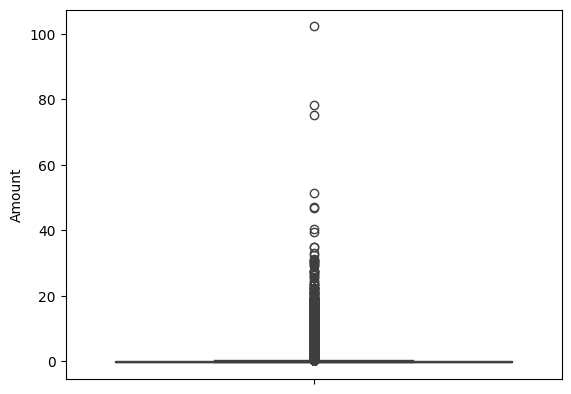

In [24]:
sns.boxplot(data["Amount"])

In [12]:
X=data.drop("Class",axis=1)
y=data["Class"]

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score

In [16]:
classifier={
    "LogisticRegression" : LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier()
}
for name,clf in classifier.items():
  print(f"\n=========={name}===========")
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  print(f"Accuracy Score : {accuracy_score(y_test,y_pred)}")
  print(f"Precision Score : {precision_score(y_test,y_pred)}")
  print(f"Recall Score : {recall_score(y_test,y_pred)}")
  print(f"F1 Score : {f1_score(y_test,y_pred)}")


==========LogisticRegression===========
Accuracy Score : 0.9992200678359603
Precision Score : 0.8870967741935484
Recall Score : 0.6043956043956044
F1 Score : 0.718954248366013

==========DecisionTreeClassifier===========
Accuracy Score : 0.9990024123483213
Precision Score : 0.6914893617021277
Recall Score : 0.7142857142857143
F1 Score : 0.7027027027027027


In [18]:
# Now we will undersample the normal samples
normal=data[data["Class"]==0]
fraud=data[data["Class"]==1]

In [19]:
normal=normal.sample(473)
# Here we have undersampled the normal transaction to the level 
# of fraud data and now again we will do the above operations

In [20]:
normal.shape

(473, 30)

In [25]:
new_data=pd.concat([normal,fraud],ignore_index=True)

In [26]:
X=new_data.drop("Class",axis=1)
y=new_data["Class"]

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
classifier={
    "LogisticRegression" : LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier()
}
for name,clf in classifier.items():
  print(f"\n=========={name}===========")
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  print(f"Accuracy Score : {accuracy_score(y_test,y_pred)}")
  print(f"Precision Score : {precision_score(y_test,y_pred)}")
  print(f"Recall Score : {recall_score(y_test,y_pred)}")
  print(f"F1 Score : {f1_score(y_test,y_pred)}")


==========LogisticRegression===========
Accuracy Score : 0.9421052631578948
Precision Score : 0.9690721649484536
Recall Score : 0.9215686274509803
F1 Score : 0.9447236180904522

==========DecisionTreeClassifier===========
Accuracy Score : 0.9157894736842105
Precision Score : 0.9215686274509803
Recall Score : 0.9215686274509803
F1 Score : 0.9215686274509803


In [30]:
# as we can see undersampling the data we have got a better precision recall and f1 score. 
# So it is better to undersample or oversample the data


In [32]:
# OVERSAMPLING
X=data.drop(["Class"],axis=1)
y=data["Class"]

In [37]:
from imblearn.over_sampling import SMOTE
X_res,y_res=SMOTE().fit_resample(X,y)
y_res.value_counts()
# Smote will add data points in between the data which is less 
# and make it equal to the larger class


Class
0    275190
1    275190
Name: count, dtype: int64

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42)

In [39]:
classifier={
    "LogisticRegression" : LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier()
}
for name,clf in classifier.items():
  print(f"\n=========={name}===========")
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  print(f"Accuracy Score : {accuracy_score(y_test,y_pred)}")
  print(f"Precision Score : {precision_score(y_test,y_pred)}")
  print(f"Recall Score : {recall_score(y_test,y_pred)}")
  print(f"F1 Score : {f1_score(y_test,y_pred)}")


==========LogisticRegression===========
Accuracy Score : 0.9434118245575784
Precision Score : 0.9729829325058185
Recall Score : 0.9120775230441975
F1 Score : 0.9415463153252066

==========DecisionTreeClassifier===========
Accuracy Score : 0.9982830044696391
Precision Score : 0.9976214685162321
Recall Score : 0.9989455120629784
F1 Score : 0.9982830512631837


In [40]:
dtc=DecisionTreeClassifier()
dtc.fit(X_res,y_res)

DecisionTreeClassifier()

In [41]:
import joblib
joblib.dump(dtc,"credit_card_predict.pkl")

['credit_card_predict.pkl']

In [42]:
model=joblib.load("credit_card_predict.pkl")

In [43]:
pred=model.predict([[1.19185711131486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,-0.166974414004614,1.61272666105479,1.06523531137287,0.48909501589608,-0.143772296441519,0.635558093258208,0.463917041022171,-0.114804663102346,-0.183361270123994,-0.145783041325259,-0.0690831352230203,-0.225775248033138,-0.638671952771851,0.101288021253234,-0.339846475529127,0.167170404418143,0.125894532368176,-0.00898309914322813,0.0147241691924927,2.69]])

C:\Users\vaibh\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [44]:
pred[0]
# as we can see we got our class as 0 which has been correctly predicted


0

In [45]:
if pred==0:
    print("Normal transaction")
else:
    print("Fraud Transaction")

Normal transaction
